In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import seaborn as sns

In [2]:
data=pd.read_csv('ML_Data_48.csv')

In [3]:
data=data.drop(['Z_jerk_mean', 'X_jerk_mean', 'total_jerk_mean', 'Y_jerk_mean','X_jerk_mean','X_jerk_min', 'X_min', 'timestamp_range'], axis=1)

In [4]:
data.columns

Index(['label', 'X_max', 'X_range', 'X_mean', 'X_rms', 'X_std', 'Y_min',
       'Y_max', 'Y_range', 'Y_mean', 'Y_rms', 'Y_std', 'Z_min', 'Z_max',
       'Z_range', 'Z_mean', 'Z_rms', 'Z_std', 'X_jerk_max', 'X_jerk_range',
       'X_jerk_rms', 'X_jerk_std', 'Y_jerk_min', 'Y_jerk_max', 'Y_jerk_range',
       'Y_jerk_rms', 'Y_jerk_std', 'Z_jerk_min', 'Z_jerk_max', 'Z_jerk_range',
       'Z_jerk_rms', 'Z_jerk_std', 'total_jerk_min', 'total_jerk_max',
       'total_jerk_range', 'total_jerk_rms', 'total_jerk_std', 'SMA',
       'X_entropy', 'Y_entropy', 'Z_entropy'],
      dtype='object')

In [5]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [6]:
x=data.drop(['label'], axis=1)
y=data['label']

In [7]:
scale=StandardScaler()
x=scale.fit_transform(x)

In [8]:
x_train, x_t, y_train, y_t= train_test_split(x,y,test_size=0.3, random_state=42)
x_train.shape, x_t.shape

((2614, 40), (1121, 40))

In [9]:
x_val, x_test, y_val, y_test= train_test_split(x_t, y_t, test_size=0.15, random_state=42)
x_val.shape, x_test.shape

((952, 40), (169, 40))

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam, SGD

2024-12-28 04:50:43.876020: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-28 04:50:43.877443: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-28 04:50:43.904922: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-28 04:50:43.904948: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-28 04:50:43.904965: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [11]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [12]:
model = Sequential([
    Dense(10, activation='relu'),
    Dense(3, activation='relu'),
    Dense(8, activation='softmax')
])

In [13]:
model.compile(optimizer=Adam(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [14]:
history = model.fit(x_train, y_train,
                                epochs=300,
                                batch_size=64,
                                validation_data= (x_val, y_val),
                                verbose=2)

Epoch 1/300
41/41 - 0s - loss: 2.0601 - accuracy: 0.1683 - val_loss: 2.0188 - val_accuracy: 0.1765 - 486ms/epoch - 12ms/step
Epoch 2/300
41/41 - 0s - loss: 1.9638 - accuracy: 0.2246 - val_loss: 1.9402 - val_accuracy: 0.2300 - 50ms/epoch - 1ms/step
Epoch 3/300
41/41 - 0s - loss: 1.8888 - accuracy: 0.2762 - val_loss: 1.8881 - val_accuracy: 0.2815 - 49ms/epoch - 1ms/step
Epoch 4/300
41/41 - 0s - loss: 1.8399 - accuracy: 0.3110 - val_loss: 1.8528 - val_accuracy: 0.2941 - 49ms/epoch - 1ms/step
Epoch 5/300
41/41 - 0s - loss: 1.7991 - accuracy: 0.3317 - val_loss: 1.8225 - val_accuracy: 0.3151 - 48ms/epoch - 1ms/step
Epoch 6/300
41/41 - 0s - loss: 1.7663 - accuracy: 0.3324 - val_loss: 1.7940 - val_accuracy: 0.3225 - 49ms/epoch - 1ms/step
Epoch 7/300
41/41 - 0s - loss: 1.7370 - accuracy: 0.3458 - val_loss: 1.7701 - val_accuracy: 0.3330 - 47ms/epoch - 1ms/step
Epoch 8/300
41/41 - 0s - loss: 1.7105 - accuracy: 0.3565 - val_loss: 1.7486 - val_accuracy: 0.3382 - 48ms/epoch - 1ms/step
Epoch 9/300
41

Epoch 68/300
41/41 - 0s - loss: 1.1666 - accuracy: 0.5589 - val_loss: 1.2675 - val_accuracy: 0.5189 - 50ms/epoch - 1ms/step
Epoch 69/300
41/41 - 0s - loss: 1.1660 - accuracy: 0.5677 - val_loss: 1.2664 - val_accuracy: 0.5273 - 50ms/epoch - 1ms/step
Epoch 70/300
41/41 - 0s - loss: 1.1633 - accuracy: 0.5589 - val_loss: 1.2692 - val_accuracy: 0.5231 - 47ms/epoch - 1ms/step
Epoch 71/300
41/41 - 0s - loss: 1.1617 - accuracy: 0.5647 - val_loss: 1.2664 - val_accuracy: 0.5221 - 46ms/epoch - 1ms/step
Epoch 72/300
41/41 - 0s - loss: 1.1601 - accuracy: 0.5673 - val_loss: 1.2659 - val_accuracy: 0.5231 - 48ms/epoch - 1ms/step
Epoch 73/300
41/41 - 0s - loss: 1.1571 - accuracy: 0.5662 - val_loss: 1.2649 - val_accuracy: 0.5252 - 47ms/epoch - 1ms/step
Epoch 74/300
41/41 - 0s - loss: 1.1568 - accuracy: 0.5681 - val_loss: 1.2658 - val_accuracy: 0.5252 - 47ms/epoch - 1ms/step
Epoch 75/300
41/41 - 0s - loss: 1.1559 - accuracy: 0.5658 - val_loss: 1.2624 - val_accuracy: 0.5221 - 47ms/epoch - 1ms/step
Epoch 76

Epoch 134/300
41/41 - 0s - loss: 1.0912 - accuracy: 0.5884 - val_loss: 1.2375 - val_accuracy: 0.5473 - 60ms/epoch - 1ms/step
Epoch 135/300
41/41 - 0s - loss: 1.0908 - accuracy: 0.5895 - val_loss: 1.2396 - val_accuracy: 0.5473 - 60ms/epoch - 1ms/step
Epoch 136/300
41/41 - 0s - loss: 1.0895 - accuracy: 0.5868 - val_loss: 1.2355 - val_accuracy: 0.5504 - 55ms/epoch - 1ms/step
Epoch 137/300
41/41 - 0s - loss: 1.0879 - accuracy: 0.5884 - val_loss: 1.2377 - val_accuracy: 0.5515 - 57ms/epoch - 1ms/step
Epoch 138/300
41/41 - 0s - loss: 1.0903 - accuracy: 0.5903 - val_loss: 1.2345 - val_accuracy: 0.5494 - 55ms/epoch - 1ms/step
Epoch 139/300
41/41 - 0s - loss: 1.0876 - accuracy: 0.5937 - val_loss: 1.2353 - val_accuracy: 0.5525 - 56ms/epoch - 1ms/step
Epoch 140/300
41/41 - 0s - loss: 1.0871 - accuracy: 0.5914 - val_loss: 1.2359 - val_accuracy: 0.5536 - 58ms/epoch - 1ms/step
Epoch 141/300
41/41 - 0s - loss: 1.0858 - accuracy: 0.5910 - val_loss: 1.2374 - val_accuracy: 0.5536 - 59ms/epoch - 1ms/step


Epoch 200/300
41/41 - 0s - loss: 1.0625 - accuracy: 0.6010 - val_loss: 1.2266 - val_accuracy: 0.5578 - 52ms/epoch - 1ms/step
Epoch 201/300
41/41 - 0s - loss: 1.0598 - accuracy: 0.6056 - val_loss: 1.2276 - val_accuracy: 0.5599 - 53ms/epoch - 1ms/step
Epoch 202/300
41/41 - 0s - loss: 1.0583 - accuracy: 0.5998 - val_loss: 1.2286 - val_accuracy: 0.5588 - 55ms/epoch - 1ms/step
Epoch 203/300
41/41 - 0s - loss: 1.0584 - accuracy: 0.6018 - val_loss: 1.2272 - val_accuracy: 0.5630 - 57ms/epoch - 1ms/step
Epoch 204/300
41/41 - 0s - loss: 1.0597 - accuracy: 0.5964 - val_loss: 1.2276 - val_accuracy: 0.5567 - 57ms/epoch - 1ms/step
Epoch 205/300
41/41 - 0s - loss: 1.0594 - accuracy: 0.5960 - val_loss: 1.2258 - val_accuracy: 0.5557 - 57ms/epoch - 1ms/step
Epoch 206/300
41/41 - 0s - loss: 1.0580 - accuracy: 0.6014 - val_loss: 1.2249 - val_accuracy: 0.5588 - 55ms/epoch - 1ms/step
Epoch 207/300
41/41 - 0s - loss: 1.0575 - accuracy: 0.6052 - val_loss: 1.2251 - val_accuracy: 0.5641 - 55ms/epoch - 1ms/step


Epoch 266/300
41/41 - 0s - loss: 1.0410 - accuracy: 0.6090 - val_loss: 1.2138 - val_accuracy: 0.5588 - 50ms/epoch - 1ms/step
Epoch 267/300
41/41 - 0s - loss: 1.0379 - accuracy: 0.6113 - val_loss: 1.2147 - val_accuracy: 0.5578 - 49ms/epoch - 1ms/step
Epoch 268/300
41/41 - 0s - loss: 1.0381 - accuracy: 0.6067 - val_loss: 1.2139 - val_accuracy: 0.5599 - 49ms/epoch - 1ms/step
Epoch 269/300
41/41 - 0s - loss: 1.0390 - accuracy: 0.6071 - val_loss: 1.2129 - val_accuracy: 0.5588 - 50ms/epoch - 1ms/step
Epoch 270/300
41/41 - 0s - loss: 1.0369 - accuracy: 0.6083 - val_loss: 1.2129 - val_accuracy: 0.5588 - 50ms/epoch - 1ms/step
Epoch 271/300
41/41 - 0s - loss: 1.0379 - accuracy: 0.6090 - val_loss: 1.2140 - val_accuracy: 0.5630 - 50ms/epoch - 1ms/step
Epoch 272/300
41/41 - 0s - loss: 1.0357 - accuracy: 0.6094 - val_loss: 1.2123 - val_accuracy: 0.5630 - 49ms/epoch - 1ms/step
Epoch 273/300
41/41 - 0s - loss: 1.0361 - accuracy: 0.6075 - val_loss: 1.2129 - val_accuracy: 0.5609 - 51ms/epoch - 1ms/step


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                410       
                                                                 
 dense_1 (Dense)             (None, 3)                 33        
                                                                 
 dense_2 (Dense)             (None, 8)                 32        
                                                                 
Total params: 475 (1.86 KB)
Trainable params: 475 (1.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


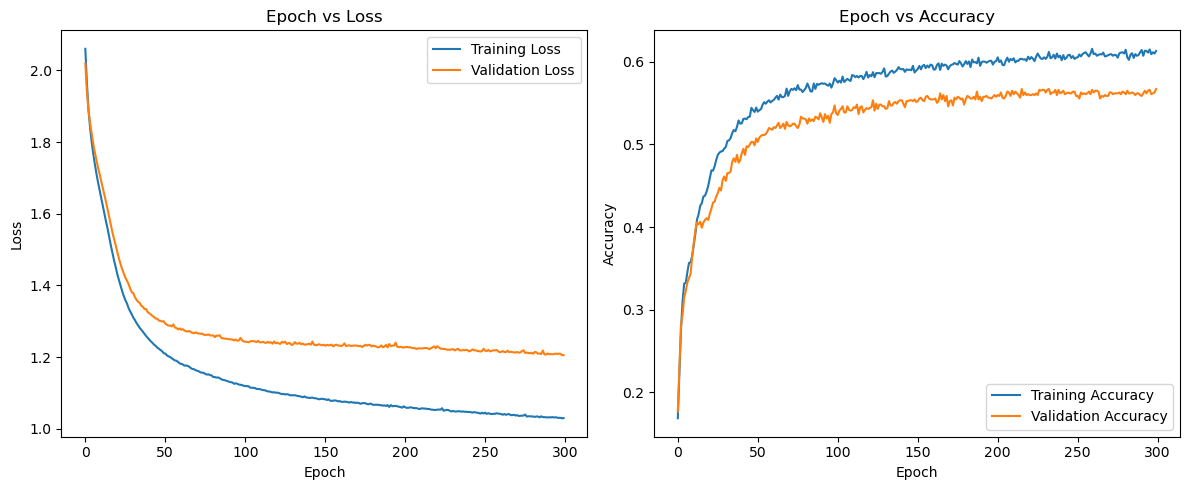

In [16]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 61.29%
Test Accuracy: 56.21%


6/6 [==============================] - 0s 887us/step


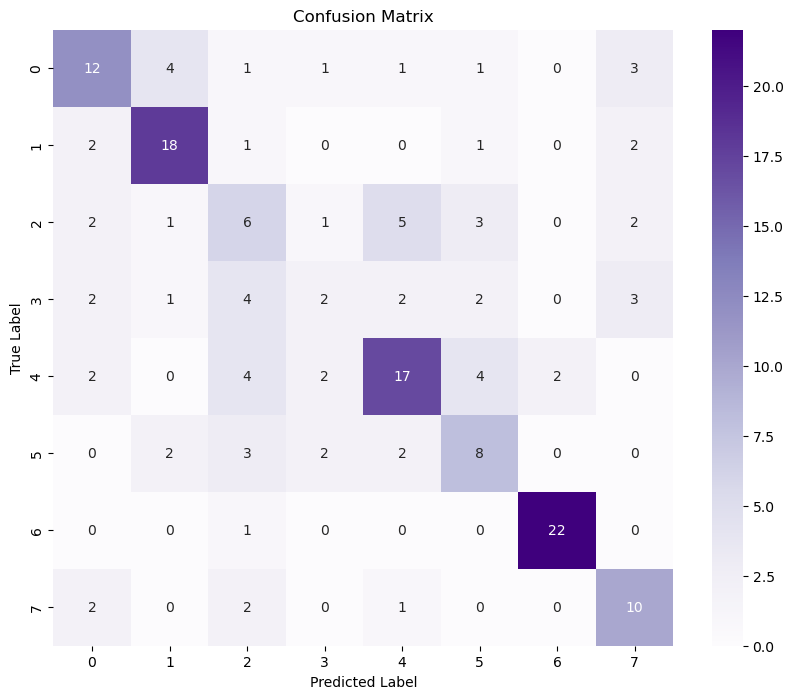

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.52      0.53        23
           1       0.69      0.75      0.72        24
           2       0.27      0.30      0.29        20
           3       0.25      0.12      0.17        16
           4       0.61      0.55      0.58        31
           5       0.42      0.47      0.44        17
           6       0.92      0.96      0.94        23
           7       0.50      0.67      0.57        15

    accuracy                           0.56       169
   macro avg       0.53      0.54      0.53       169
weighted avg       0.55      0.56      0.55       169



In [18]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

if len(y_test.shape) == 1 or y_test.shape[1] == 1:
    y_true = y_test  
else:
    y_true = np.argmax(y_test, axis=1)  


conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_true, y_pred_classes, target_names=[str(i) for i in range(len(np.unique(y_true)))])
print("Classification Report:")
print(class_report)
